<a href="https://colab.research.google.com/github/osohyun0224/BigData-Final-Project/blob/master/MedicalData_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS/view?usp=drive_link
system("gdown --id 1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS")
system("ls", TRUE)

[1] "healthcare_dataset.csv" "sample_data"

In [ ]:
data <- read.csv("healthcare_dataset.csv")

In [ ]:
str(data)

'data.frame':	10000 obs. of  15 variables:
 $ Name              : chr  "Tiffany Ramirez" "Ruben Burns" "Chad Byrd" "Antonio Frederick" ...
 $ Age               : int  81 35 61 49 51 41 82 55 33 39 ...
 $ Gender            : chr  "Female" "Male" "Male" "Male" ...
 $ Blood.Type        : chr  "O-" "O+" "B-" "B-" ...
 $ Medical.Condition : chr  "Diabetes" "Asthma" "Obesity" "Asthma" ...
 $ Date.of.Admission : chr  "2022-11-17" "2023-06-01" "2019-01-09" "2020-05-02" ...
 $ Doctor            : chr  "Patrick Parker" "Diane Jackson" "Paul Baker" "Brian Chandler" ...
 $ Hospital          : chr  "Wallace-Hamilton" "Burke, Griffin and Cooper" "Walton LLC" "Garcia Ltd" ...
 $ Insurance.Provider: chr  "Medicare" "UnitedHealthcare" "Medicare" "Medicare" ...
 $ Billing.Amount    : num  37491 47304 36875 23303 18086 ...
 $ Room.Number       : int  146 404 292 480 477 180 161 384 215 310 ...
 $ Admission.Type    : chr  "Elective" "Emergency" "Emergency" "Urgent" ...
 $ Discharge.Date    : chr  "2022-12

In [ ]:
install.packages("tidyverse")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(repr)

In [ ]:
df <- fread("healthcare_dataset.csv") %>% as_tibble()

In [ ]:
summary(df)

     Name                Age           Gender           Blood Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical Condition  Date of Admission       Doctor            Hospital        
 Length:10000       Min.   :2018-10-30   Length:10000       Length:10000      
 Class :character   1st Qu.:2020-02-10   Class :character   Class :character  
 Mode  :character   Median :2021-05-02   Mode  :character   Mode  :character  
                    Mean   :2021-05-01                                        
                    3rd Qu.:2022-07-23                                        
        

## 선형 회귀 모델 분석
### 귀무가설: 환자의 나이는 의료 서비스에 대한 청구 금액에 영향을 미치지 않는다.
### 대립가설: 환자의 나이는 의료 서비스에 대한 청구 금액에 영향을 미친다.

In [ ]:
install.packages("psych")
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
describe(df)
describe(df) %>% round(.,2)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Name*,1,10000,4693.6494,2.697154e+03,4684.50,4694.821125,3453.7167,1.000,9378.0,9377.00,-0.003609734,-1.192705,2.697154e+01
Age,2,10000,51.4522,1.958897e+01,52.00,51.489000,25.2042,18.000,85.0,67.00,-0.012144215,-1.205294,1.958897e-01
Gender*,3,10000,1.4925,4.999687e-01,1.00,1.490625,0.0000,1.000,2.0,1.00,0.029998875,-1.999300,4.999687e-03
Blood Type*,4,10000,4.4993,2.286596e+00,4.00,4.499125,2.9652,1.000,8.0,7.00,0.004015200,-1.233060,2.286596e-02
Medical Condition*,5,10000,3.4875,1.701803e+00,3.00,3.484375,1.4826,1.000,6.0,5.00,0.013486678,-1.265853,1.701803e-02
Date of Admission,6,10000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Doctor*,7,10000,4713.6510,2.713557e+03,4703.50,4714.490750,3479.6622,1.000,9416.0,9415.00,-0.003422827,-1.195984,2.713557e+01
Hospital*,8,10000,4350.3075,2.500044e+03,4342.50,4356.464875,3213.5355,1.000,8639.0,8638.00,-0.016235504,-1.197810,2.500044e+01
Insurance Provider*,9,10000,2.9799,1.413045e+00,3.00,2.974875,1.4826,1.000,5.0,4.00,0.025553380,-1.294003,1.413045e-02


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Name*,1,10000,4693.65,2697.15,4684.50,4694.82,3453.72,1.00,9378.0,9377.00,0.00,-1.19,26.97
Age,2,10000,51.45,19.59,52.00,51.49,25.20,18.00,85.0,67.00,-0.01,-1.21,0.20
Gender*,3,10000,1.49,0.50,1.00,1.49,0.00,1.00,2.0,1.00,0.03,-2.00,0.00
Blood Type*,4,10000,4.50,2.29,4.00,4.50,2.97,1.00,8.0,7.00,0.00,-1.23,0.02
Medical Condition*,5,10000,3.49,1.70,3.00,3.48,1.48,1.00,6.0,5.00,0.01,-1.27,0.02
Date of Admission,6,10000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Doctor*,7,10000,4713.65,2713.56,4703.50,4714.49,3479.66,1.00,9416.0,9415.00,0.00,-1.20,27.14
Hospital*,8,10000,4350.31,2500.04,4342.50,4356.46,3213.54,1.00,8639.0,8638.00,-0.02,-1.20,25.00
Insurance Provider*,9,10000,2.98,1.41,3.00,2.97,1.48,1.00,5.0,4.00,0.03,-1.29,0.01


In [ ]:
summary(data)

     Name                Age           Gender           Blood.Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical.Condition  Date.of.Admission     Doctor            Hospital        
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

결측치가 있는 지 확인하고 처리하는 과정을 수행한다.

In [ ]:
#결측치가 있는 행을 제거한다.
data <- na.omit(data)

이상치가 있는지 탐색하고 제거하는 과정을 수행한다.

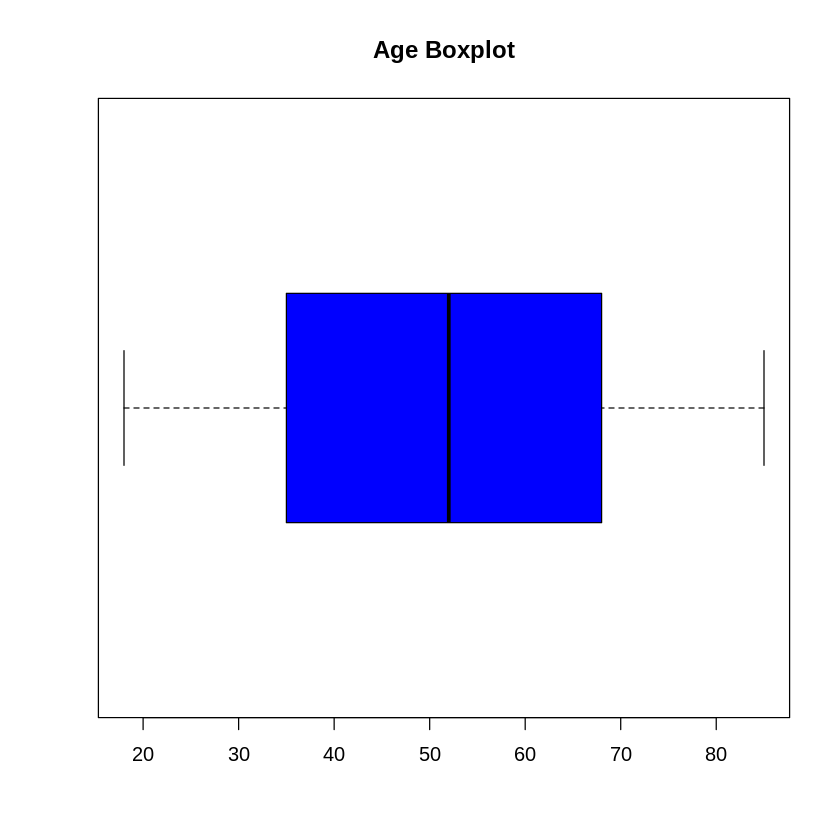

In [ ]:
# Age의 이상치 확인
boxplot(data$Age, main="Age Boxplot", horizontal=TRUE, col="blue")

In [ ]:
# IQR 계산
Q1 <- quantile(data$Age, 0.25)
Q3 <- quantile(data$Age, 0.75)
IQR <- Q3 - Q1

# 이상치 경계값 계산
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# 결과 출력
print(paste("Lower bound:", lower_bound))
print(paste("Upper bound:", upper_bound))


[1] "Lower bound: -14.5"
[1] "Upper bound: 117.5"


위의 데이터 셋은 10대부터 80대까지의 나이 정보가 있습니다. 따라서 이상치를 결측할때 실제 데이터 값의 범위를 반영하지 않으므로 이상치가 실제 데이터 범위와 가깝게 나오지 않았습니다.

이에는 여러가지 원인이 있을 수 있습니다. 제가 생각하기에는 해당 데이터가 중앙에 집중되어있기 때문에 균등하게 분포되어있어 실제 데이터 범위에서 크게 벗어난 이상치 경계값이 계산 된 것 같다고 생각합니다.

In [ ]:
# 이상치 제거
data_filtered <- data[data$Age >= 10 & data$Age <= 90, ]   # 일반적으로 나이는 10세 이상 90세 이하로 설정

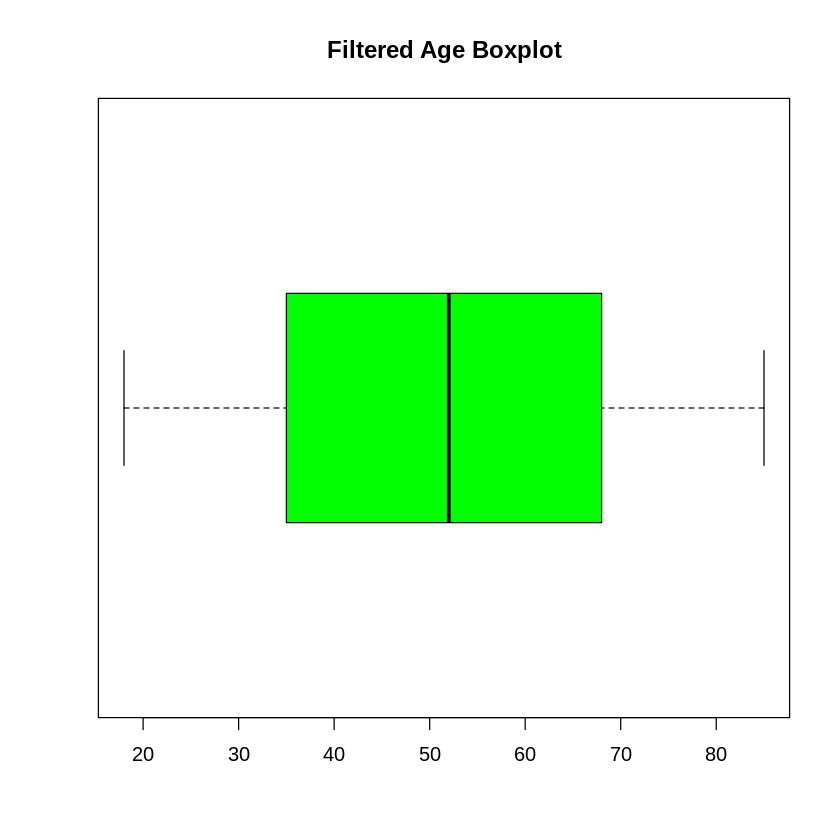

In [ ]:
# 이상치 제거 후 데이터 분포 확인
boxplot(data_filtered$Age, main="Filtered Age Boxplot", horizontal=TRUE, col="green")

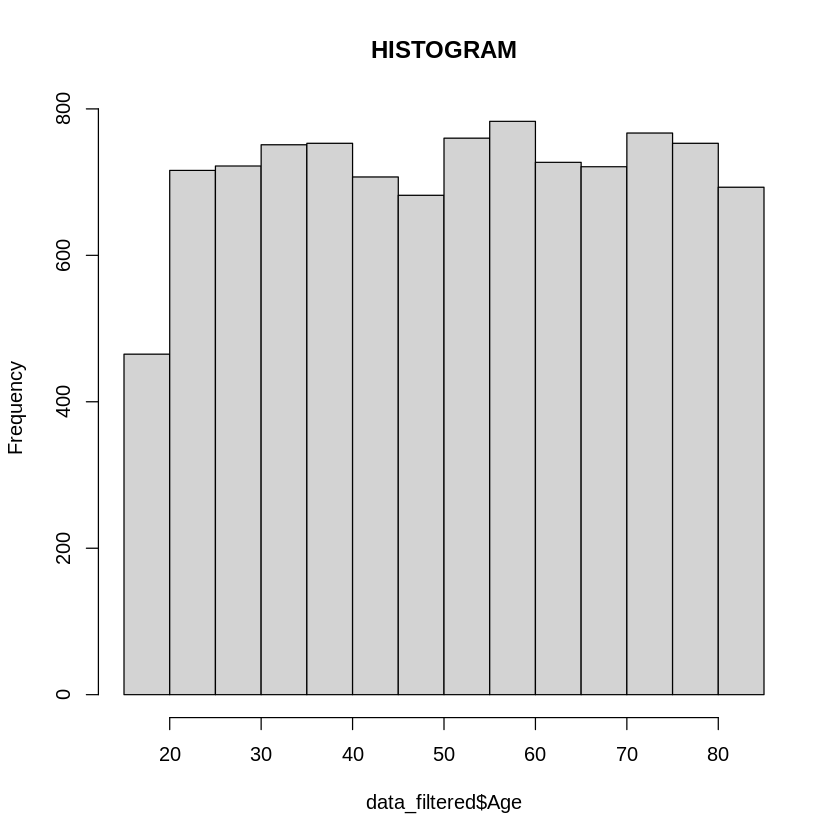

In [ ]:
hist(x=data_filtered$Age, main ='HISTOGRAM')

위의 데이터 분포를 통해 데이터의 대부분이 30대에서 60대 사이에 분포하는 것으로 보입니다.
10대와 80대까지 있는 것으로 확인을 하였고, 10대의 비율이 적은 것을 확인했습니다.
나이 데이터의 요약 통계와 최소값 최대값을 확인하려고 합니다.

In [ ]:
# 나이 데이터의 요약 통계 확인
summary(data$Age)

# 나이 데이터의 최소값과 최대값 확인
min(data$Age)
max(data$Age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   52.00   51.45   68.00   85.00 

[1] 18

[1] 85

### 병원 청구 금액에 대한 데이터 정제

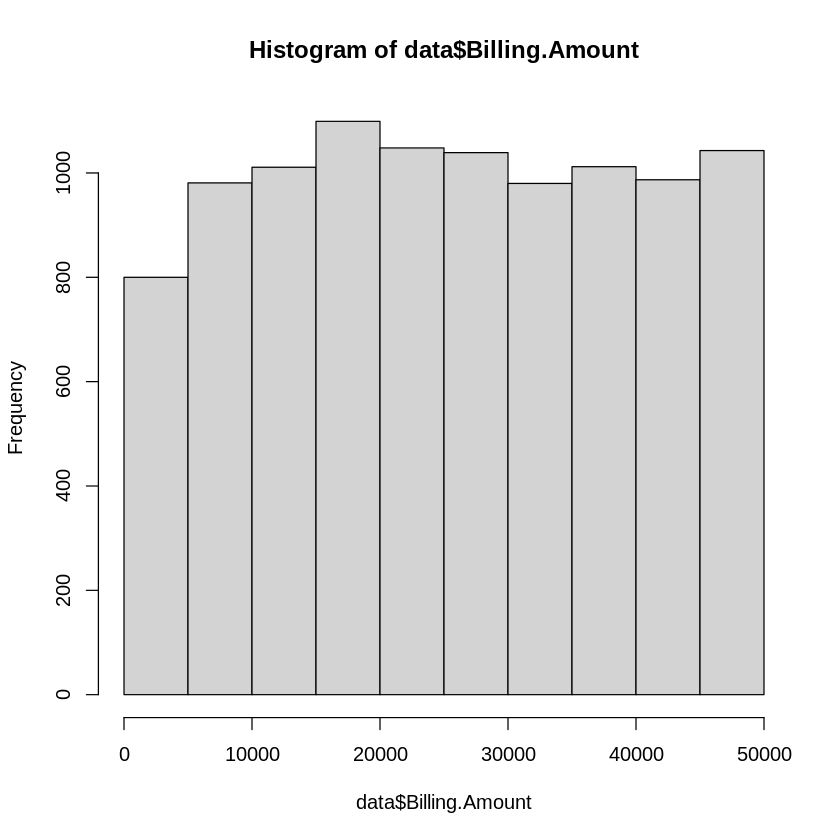

In [ ]:
# 히스토그램으로 나타낸 병원 청구 금액 데이터 분포
hist(data$Billing.Amount)

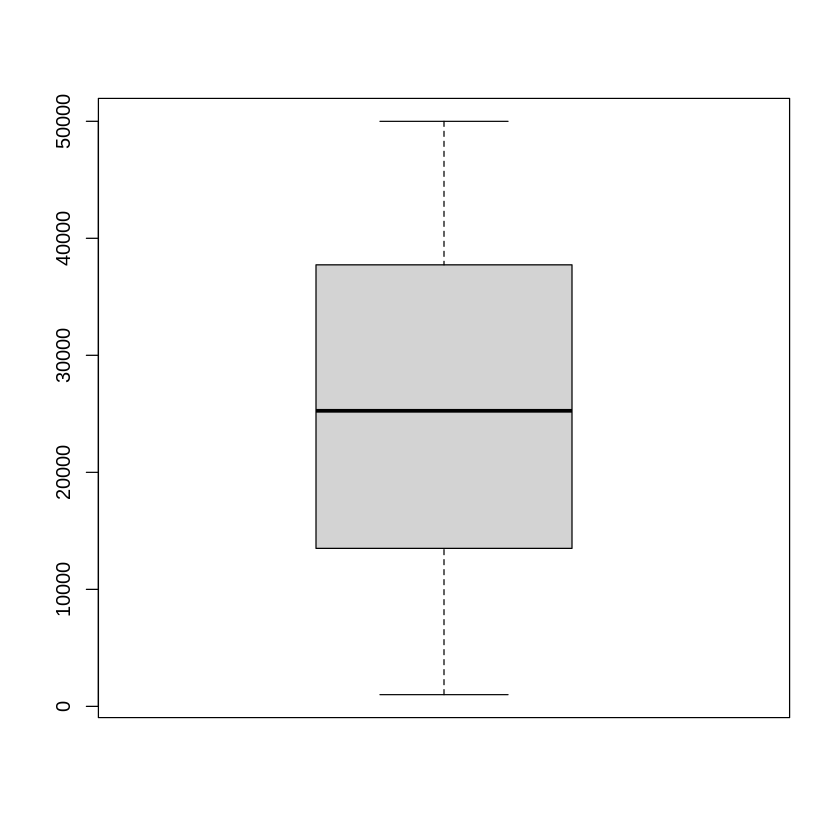

In [ ]:
# 박스플롯으로 나타낸 병원 청구 금액 데이터 분포
boxplot(data$Billing.Amount)

In [ ]:
install.packages("rsample")
library(rsample)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
# set.seed()를 사용하여 무작위 추출이 일정하게 유지되도록
set.seed(42)
data_split <- initial_split(data_filtered, prop = 0.7)
train_data <- training(data_split)
test_data <- testing(data_split)

# 선형회귀모델

In [ ]:
linear_model <- lm(Billing.Amount ~ Age, data = train_data)
summary(linear_model)


Call:
lm(formula = Billing.Amount ~ Age, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24721.1 -11923.5    -47.8  12150.3  24477.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25854.535    472.456   54.72   <2e-16 ***
Age            -4.382      8.597   -0.51     0.61    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14040 on 6998 degrees of freedom
Multiple R-squared:  3.712e-05,	Adjusted R-squared:  -0.0001058 
F-statistic: 0.2598 on 1 and 6998 DF,  p-value: 0.6103


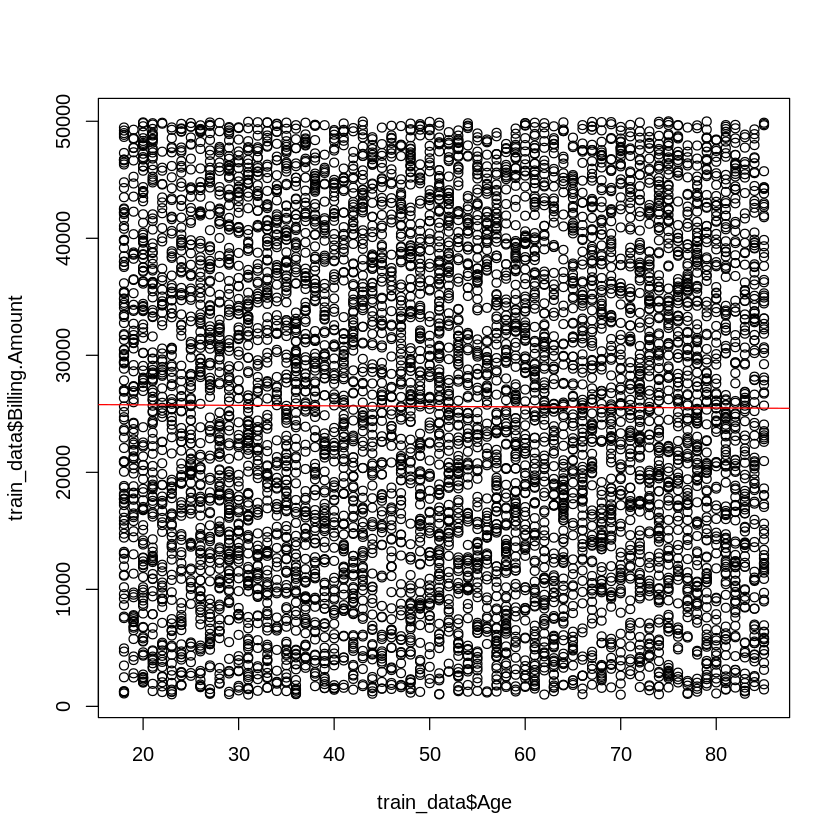

In [ ]:
plot(train_data$Age, train_data$Billing.Amount)
abline(linear_model, col="red")

위의 그래프를 확인하면 나이와 청구 금액으로만 2차원 그래프를 작성하였습니다.


하지만 해당 그래프로는 관계성을 보지 못했습니다. 연관성을 찾지 못해 해석할 수 없었습니다.

따라서 해당 그래프에 축을 추가하여 선형성을 확인해보고자 아래와 같은 과정을 진행하기로 하였습니다.

In [ ]:
# scatterplot3d 패키지를 설치
install.packages("scatterplot3d")
library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---

# 3-Dimension Regression in Train dataset

3차원으로 그리기 위해서 차원 증가를 진행하였습니다.<br/>
여기서 MSE(평균 제곱 오차)를 구했으나, 그 숫자가 너무 큰 이슈가 발생하였습니다.<br/>
따라서 모델 연산이 되지 않았고, MSE를 2로 나누어 표준화시켜주었습니다.

In [ ]:
# 차원 증가
# (평균((나이 - 청구금액)^2)) / 청구금액
# Mean Sqaured Error를 갖고 잔차를 구함
train_data$residuals <- mean((train_data$Age - train_data$Billing.Amount)^2)/train_data$Billing.Amount
train_data$residuals

[1] 150646.20  18836.66  89264.18  19110.25 246962.07  18439.84  18203.06
   [8] 119148.86 126605.22  21934.25  33662.87  45963.87  18123.77  43851.08
  [15]  19164.64  26674.54  34717.65 454557.13  80816.77 195223.12  30190.70
  [22] 489455.26  45261.60  18401.17  26112.27  19100.73  70376.71 579311.04
  [29]  50880.69  20339.23  85428.47  32499.21  43991.31  23204.09 319360.72
  [36]  67523.36  20111.43  32393.73  26045.45  19421.68 110312.93  46868.53
  [43]  20684.60 247726.63  19540.79  21266.24  43129.07  33758.25  24158.97
  [50]  27546.42  31323.51  17134.86  22535.74  20170.05 116530.35 217153.47
  [57]  37156.92  60964.66 132059.80  66718.88  22137.86  17357.99  19390.89
  [64]  36130.27 185567.93  37516.88  91707.36  67242.79  18115.03  17593.76
  [71]  45439.67  30911.88 133186.23  33702.32  38309.57  65395.34  20737.18
  [78]  75515.26  76992.52  21522.79  18597.64  18237.76 112814.97  37144.47
  [85]  25101.61  38975.11  18587.92  88029.22  28821.45  86382.23 140625.71
  [92]  18408.25  17590.36  27463.25 118291.98 235215.34  83143.24  41845.06
  [99]  45570.50  17296.55 302594.68  41808.44 240460.28  20388.79  80946.25
 [106]  69235.98  17958.32  51782.57  28571.80  17254.41  75197.16 230978.09
 [113]  25265.65 274362.32  17094.86  23902.23  47698.81  26100.28  92306.91
 [120]  27385.17  22028.08 206061.16  58622.52 233381.64  54593.47  86139.56
 [127]  29240.15  36128.02  59623.68  21717.66  20840.29  84788.49  33504.64
 [134]  19521.41  36998.83 209762.78  50536.88  56796.82  55245.11 146497.90
 [141] 101883.33  22814.84  24025.44  37632.66 109181.71  19740.88 196288.09
 [148]  42613.51  22061.26  33633.70  32984.18  20468.11  30010.42  21021.34
 [155]  19668.92  67277.41  17994.53  19200.52 262088.08  40473.39  17269.57
 [162]  17386.02  25299.98  18483.30  17846.43  54058.28 139069.73  44935.24
 [169] 107445.94  30562.31  19930.40  17731.46  45322.59  30615.92  93536.27
 [176]  23539.96  18847.47  26829.69  78805.03  24551.92  17450.90  19049.41
 [183]  85604.77 105017.05  39368.97 588783.01 334211.68  18245.21  28288.14
 [190]  19327.19  22961.40  19183.79  85992.07 112151.49 687988.73  71429.18
 [197]  32803.99  46768.09  21374.85  68073.84  40416.66  17142.25  21415.47
 [204]  22171.69  40877.63  22106.40  17531.02  17980.36  66182.36 401823.14
 [211]  20601.40  19688.39  46218.89  36268.66  76053.40 153680.47  29078.08
 [218]  22914.64 473450.54  30848.57  18215.46  17352.83  41435.11 104282.81
 [225]  22009.71  19365.40  17067.09  34355.08 323121.90  27763.99  20125.16
 [232]  22218.96  29808.80  18034.83  47394.15  18684.85  41592.52  32173.13
 [239]  26592.08  19770.56 155893.13  35416.34  24858.96  44072.51 157509.06
 [246]  29733.25  50981.03  37961.40  19732.69  42895.22  24988.14  61908.37
 [253]  56765.98  53044.76  22996.14  20883.20  37816.68  21702.60 186311.71
 [260]  60925.40  17832.73  25020.24  21356.87  26148.04  26674.60 192247.15
 [267]  38052.64  46926.14  30004.95  21405.66  24908.96  47358.33  28477.54
 [274]  37579.96  24461.64  33096.45  30443.40  17562.91  23350.54  46203.24
 [281]  23040.41  22532.46  31181.47  65110.98  31168.08  73551.47  98389.89
 [288]  24536.17  22744.61  29550.00  17770.83  25202.17  32787.82  69668.16
 [295]  19717.79 100512.46  46037.62  30938.14  61606.47  17058.38  31024.58
 [302]  22206.34  43735.91  19972.03 234920.98  39856.08  24053.20  35561.97
 [309]  42356.82  18427.34  28186.28  53319.37  48643.53 133429.06  21750.55
 [316]  32920.90  25731.36  18669.42 413388.21  21414.52  38392.93  73560.85
 [323]  20557.60  63727.14 139940.99 299856.69 124105.66  19011.70 131610.87
 [330]  20163.10  17080.65  41048.04  18534.25  18139.73  42376.60  33995.11
 [337] 377998.71  35471.11  60348.84  18039.31  35939.10  18861.96 231792.65
 [344] 121985.60  23754.15  41590.56  71943.95  19031.44  78135.87  88061.13
 [351]  34427.50  36289.25  29183.83  17276.62  19247.27  26005.35  18223.75
 [358]  35772.12  20726.00  35024.88  69335.28  80361.98  17656.75  57366.44

위의 과정은 데이터의 패턴을 더 잘 파악하기 위해 나이, 청구금액에서 추가로 잔차를 시각화하는 3차원 플롯을 그렸습니다.

# 시도 1: 회귀 평면을 추가하였음


Call:
lm(formula = Age ~ Billing.Amount + residuals, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.708 -16.694   0.307  16.785  35.030 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.229e+01  7.299e-01  71.636   <2e-16 ***
Billing.Amount -2.542e-05  2.130e-05  -1.193    0.233    
residuals      -3.873e-06  3.044e-06  -1.272    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.52 on 6997 degrees of freedom
Multiple R-squared:  0.0002684,	Adjusted R-squared:  -1.731e-05 
F-statistic: 0.9394 on 2 and 6997 DF,  p-value: 0.3909


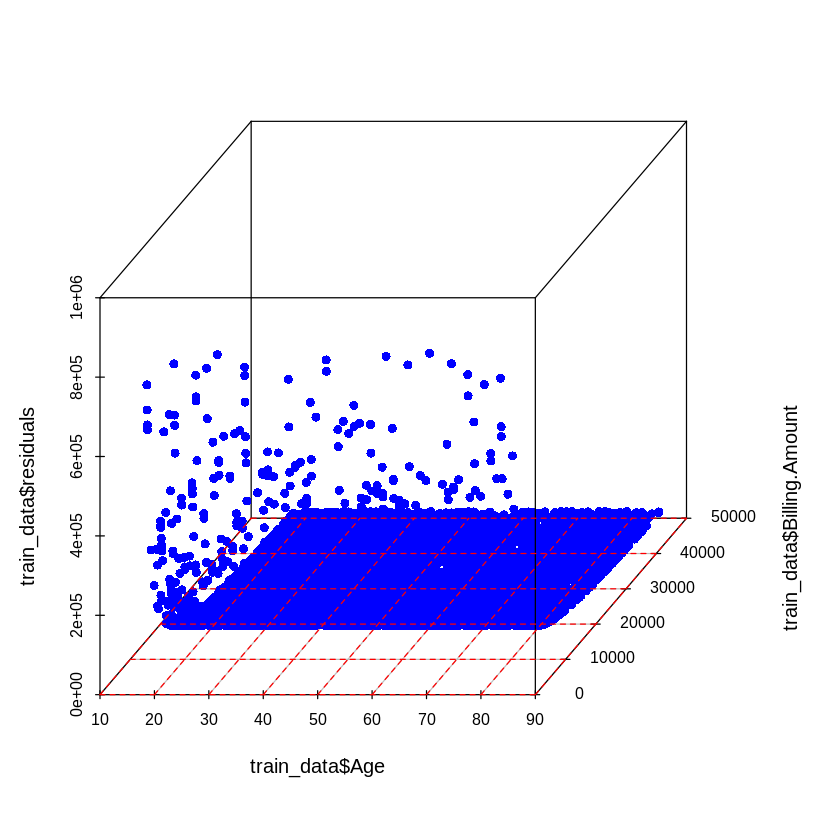

In [ ]:
# 선형 회귀 모델을 구축
model <- lm(Age ~ Billing.Amount + residuals, data = train_data)
summary(model)

# 3D 스캐터 플롯을 그림
s3d <- scatterplot3d(train_data$Age, train_data$Billing.Amount, train_data$residuals, color = "blue", pch = 16)

# 회귀 평면을 추가
intercept <- coef(model)[1]  # 절편
slope <- coef(model)[2]      # 기울기

# 회귀 평면 추가 , 색상을 지정하고 투명도 옵션은 제거
# s3d$plane3d(intercept, slope, 0, col = "red")
s3d$plane3d(coef(model), col="red")


# 3-Dimension Regression in Test dataset

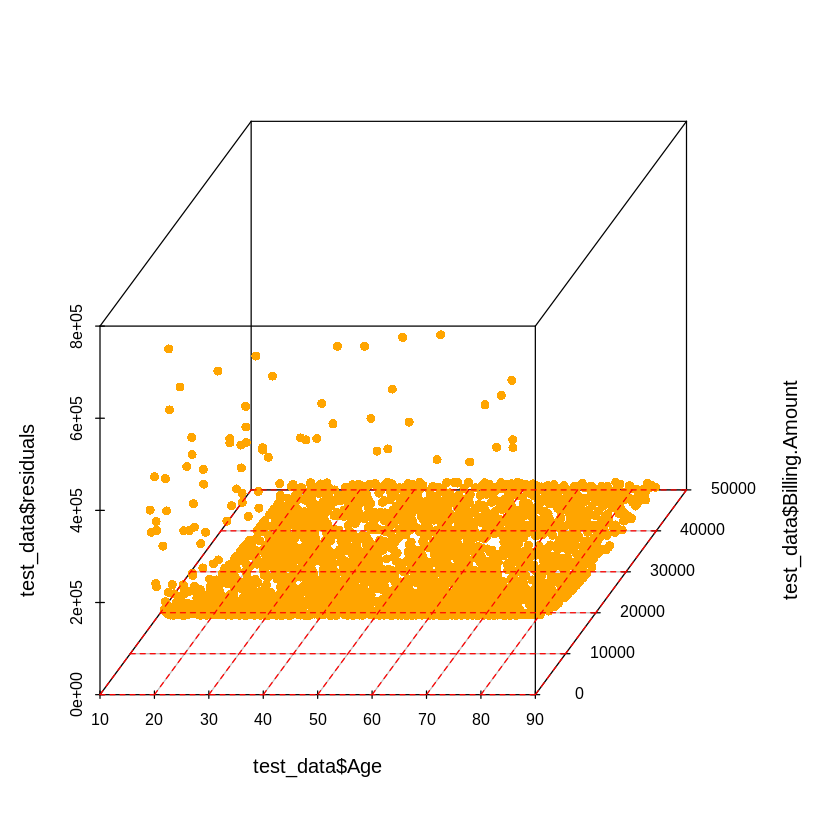

In [ ]:
# 차원 증가
# (평균((나이 - 청구금액)^2)) / 청구금액
# Mean Sqaured Error를 갖고 잔차를 구함
test_data$residuals <- mean((test_data$Age - test_data$Billing.Amount)^2)/test_data$Billing.Amount

# 3D 스캐터 플롯을 그림
s3d <- scatterplot3d(test_data$Age, test_data$Billing.Amount, test_data$residuals, color = "orange", pch = 16)

# 회귀 평면을 추가
intercept <- coef(model)[1]  # 절편
slope <- coef(model)[2]      # 기울기

# 회귀 평면 추가 , 색상을 지정하고 투명도 옵션은 제거
# s3d$plane3d(intercept, slope, 0, col = "red")
s3d$plane3d(coef(model), col="red")